<a href="https://colab.research.google.com/github/Melinnaaa/ADA-Informes/blob/main/Informe4_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**

**Entrada**: Arreglo de numeros $[a_1,...,a_n]$

**Salida**: Arreglo ordenado de manera ascendente, tal que $a_1 <= a_2 <= ... <= a_n$

El tamaño del problema es indicado por la cantidad de datos ingresados en la entrada, por lo cual correspondería a **n**.

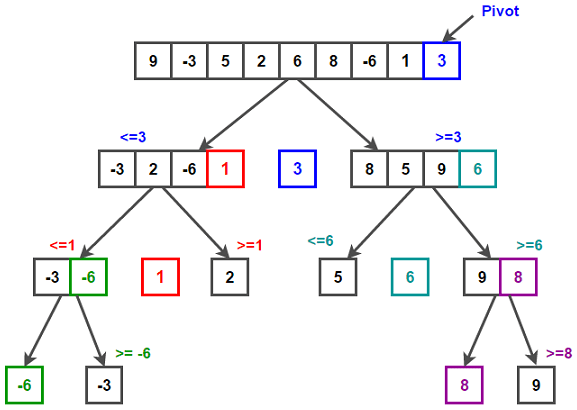

El problema de ordenamiento siempre ha sido un tema del que hablar, y a este se le han buscado distintas soluciones, tales como: *MergeSort, BubbleSort, InsertionSort, entre otros*. En este caso toca hablar del *QuickSort*, el cual se utilizará el paradigma "Divide y venceras", ya que está implementado de manera recursiva.

# **2. QuickSort**

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **QuickSort.**

### Partition Right


In [152]:
from termcolor import colored

# Caso en que el pivote sea el ultimo elemento
def rightPartition(array, left, right, cont, verbose = False):
  i = left 
  j = right - 1 
  # Se toma al pivote como el ultimo elemento
  pivot = array[right] 
  if (verbose == True):
    print("Pivote:", colored(f"{str(array[right])}","red"))

  # Mientras los indices no se cruzen
  while i < j:
    cont[0] += 1
    # Se busca un elemento mayor al pivote
    while i < right and array[i] < pivot:
      cont[0] += 1
      i += 1
    # Se busca un elemento menor o igual al pivote
    while j > left and array[j] >= pivot:
      cont[0] += 1
      j -= 1

    # Si los indices no se cruzaron se intercambian
    if (i < j):
      if (verbose == True):
        print("No se han cruzado (i, j):", i, "<", j)
      array[i], array[j] = array[j], array[i]
    cont[0] += 1

  # Si el elemento en la posición i-ésima es mayor que el pivote se efectúa el swap.
  if (array[i] > pivot):
    if (verbose == True):
      print("Se realiza un swap:", array[i], ">", pivot)
    array[i], array[right] = array[right], array[i]
  cont[0] += 1
  return i

def rightQuicksort (array, left, right, cont, verbose = False): 
  # Mientras el largo del arreglo sea mayor que 1 
  if (left < right):
    partition_pos = rightPartition(array, left, right, cont, verbose)
    # Se muestra que la propiedad se cumpla
    if (verbose == True):
      print("Subarreglo izquierdo:", colored(f"{str(array[:partition_pos])}","blue"), "<", array[partition_pos])
      print("Subarreglo derecho:", colored(f"{str(array[partition_pos + 1:])}","green"), ">", array[partition_pos])
    # Subarreglo izquierdo
    rightQuicksort(array, left, partition_pos - 1, cont, verbose) 
    # Subaarreglo derecho
    rightQuicksort(array, partition_pos + 1, right, cont, verbose)

cont =[0]
a = [2, 10, 44, 19, 20, 3]
print("Entrada:", a)
rightQuicksort(a, 0, len(a)-1, cont, verbose = False)
print("Salida:", a)
print ("Cantidad de comparaciones", cont[0])

Entrada: [2, 10, 44, 19, 20, 3]
Salida: [2, 3, 10, 19, 20, 44]
Cantidad de comparaciones 19


### Partition left

In [151]:
def leftPartition(array, left, right, cont):
  # El pivote es el primer elemento
  pivot = array[left]
  # i parte desde la derecha del pivote
  i = left + 1 
  j = right

  while True:
    cont[0] += 1
    while i <= j and array[i] <= pivot:
      cont[0] += 1
      i += 1   
    
    while  array[j] >= pivot and j >= i:
      cont[0] += 1
      j -= 1  
    # Si se cruzan se encuentra el punto de particion
    if j < i:
      cont[0] += 1
      break
    
      # Si no se han cruzado  
    else:
      cont[0] += 1
      array[i], array[j] = array[j], array[i]
          
  # Se realiza el swap
  array[left], array[j] = array[j], array[left]

  return j

def leftQuicksort (array, left, right, cont): 
  if (left < right): 
    partition_pos = leftPartition(array, left, right, cont)
    leftQuicksort(array, left, partition_pos-1, cont) 
    leftQuicksort(array, partition_pos+1, right, cont)

cont = [0]
a = [2, 10, 44, 19, 20, 3]
print("Entrada:", a)
leftQuicksort(a, 0, len(a)-1, cont)
print("Salida:", a)
print ("Cantidad de comparaciones", cont[0])

Entrada: [2, 10, 44, 19, 20, 3]
Salida: [2, 3, 10, 19, 20, 44]
Cantidad de comparaciones 22


### Partition Mid


In [155]:
import random
import numpy as np

def getMedian(array, left, right, cont):
  n = len(array)
  rand = [0,0,0]
  for i in range (0,3):
    rand[i] = array[random.randint(left, right)]
  
  np.sort(rand)
  k = array.index(rand[1])
  return k 

def midPartition(array, left, right, cont):

  median = getMedian(array, left, right, cont)
  array[left], array[median] = array[median], array[left]
  pivot = array[left]
  i = left

  # Se recorre desdeel comienzo + 1, hasta el final
  for j in range(left + 1, right + 1):
    cont[0] += 1
    # Si es menor se realiza un swap
    if (array[j] < pivot):
        i = i + 1
        array[i], array[j] = array[j], array[i]
    cont[0] += 1

  # Se cambia el puntero por el menor elemento
  array[i], array[left] = array[left], array[i]

  return i

def midQuicksort (array, left, right, cont): 
  # Mientras el largo del arreglo sea mayor que 1 
  if (left < right):
    partition_pos = midPartition(array, left, right, cont)
    # Subarreglo izquierdo
    midQuicksort(array, left, partition_pos - 1, cont) 
    # Subaarreglo derecho
    midQuicksort(array, partition_pos + 1, right, cont)

cont = [0]
a = [2, 10, 44, 19, 20, 3]
print("Entrada:", a)
midQuicksort(a, 0, len(a)-1, cont)
print("Salida:", a)
print ("Cantidad de comparaciones", cont[0])

Entrada: [2, 10, 44, 19, 20, 3]
Salida: [2, 3, 10, 19, 20, 44]
Cantidad de comparaciones 18


## 2.2. Descripción del algoritmo

### QuickSort

El algoritmo recibe como entrada una lista (o arreglo) ***array*** con una cantidad de **n** elementos a ordenar. El algoritmo se implementa de forma *recursiva*. Tomemos **p** cómo la partición.


1.   *Divide* el arreglo en dos subarreglos de largo.

2.   Para cada subarreglo se cumple que todos los elementos de la parte izquierda son menores o iguales a p ($array[0:q] <= q$), y los elementos de la parte derecha son mayores o iguales a p ($q <= array[q+1:n+1]$).

3.   Se vuelve a llamar a *QuickSort* para ordenar cada subarreglo obtenido.

Si la variable `verbose` es `True` se muestra información para ver lo que ocurre paso a paso dentro de la función.






### Función *Partition*

Esta es la función encargada de que los elementos a la izquierda del pivote sean menores y los de su derecha mayores.

La función recibe los siguientes datos de entrada:


*   *array*: El arreglo a ordenar.
*   *left*: Posición más a la izquierda.
*   *right*: Posición más a la derecha.
*   *cont*: Cantidad de comparaciones.
*   *verbose*: Variable que muestra lo que ocurre dentro de la función.

Pasos que sigue la función.

Cabe decir que **i** comienza desde la izquierda y **j** desde la derecha - 1, tomando cómo pivote el ultimo elemento del arreglo

1.   Se escoge un pivote, este puede ser el primer elemento, el ultimo o la mediana.

2.   Se itera *i* (i+=1) mientras el elemento en esa posición no sea mayor al pivote y este no llegue al final del arreglo. A su vez se itera *j* (j-=1) mientras este sea mayor o igual al pivote y no esté en el comienzo del arreglo. 

3. Si ```i < j``` siginifica que no se han cruzado y se efectúa un swap.

4.   Si la posición *i* es mayor al pivote, se realiza un **swap** y se retorna la posición *i*, la cual es el punto en donde se dividirá el arreglo.



## 2.3. Ejemplo


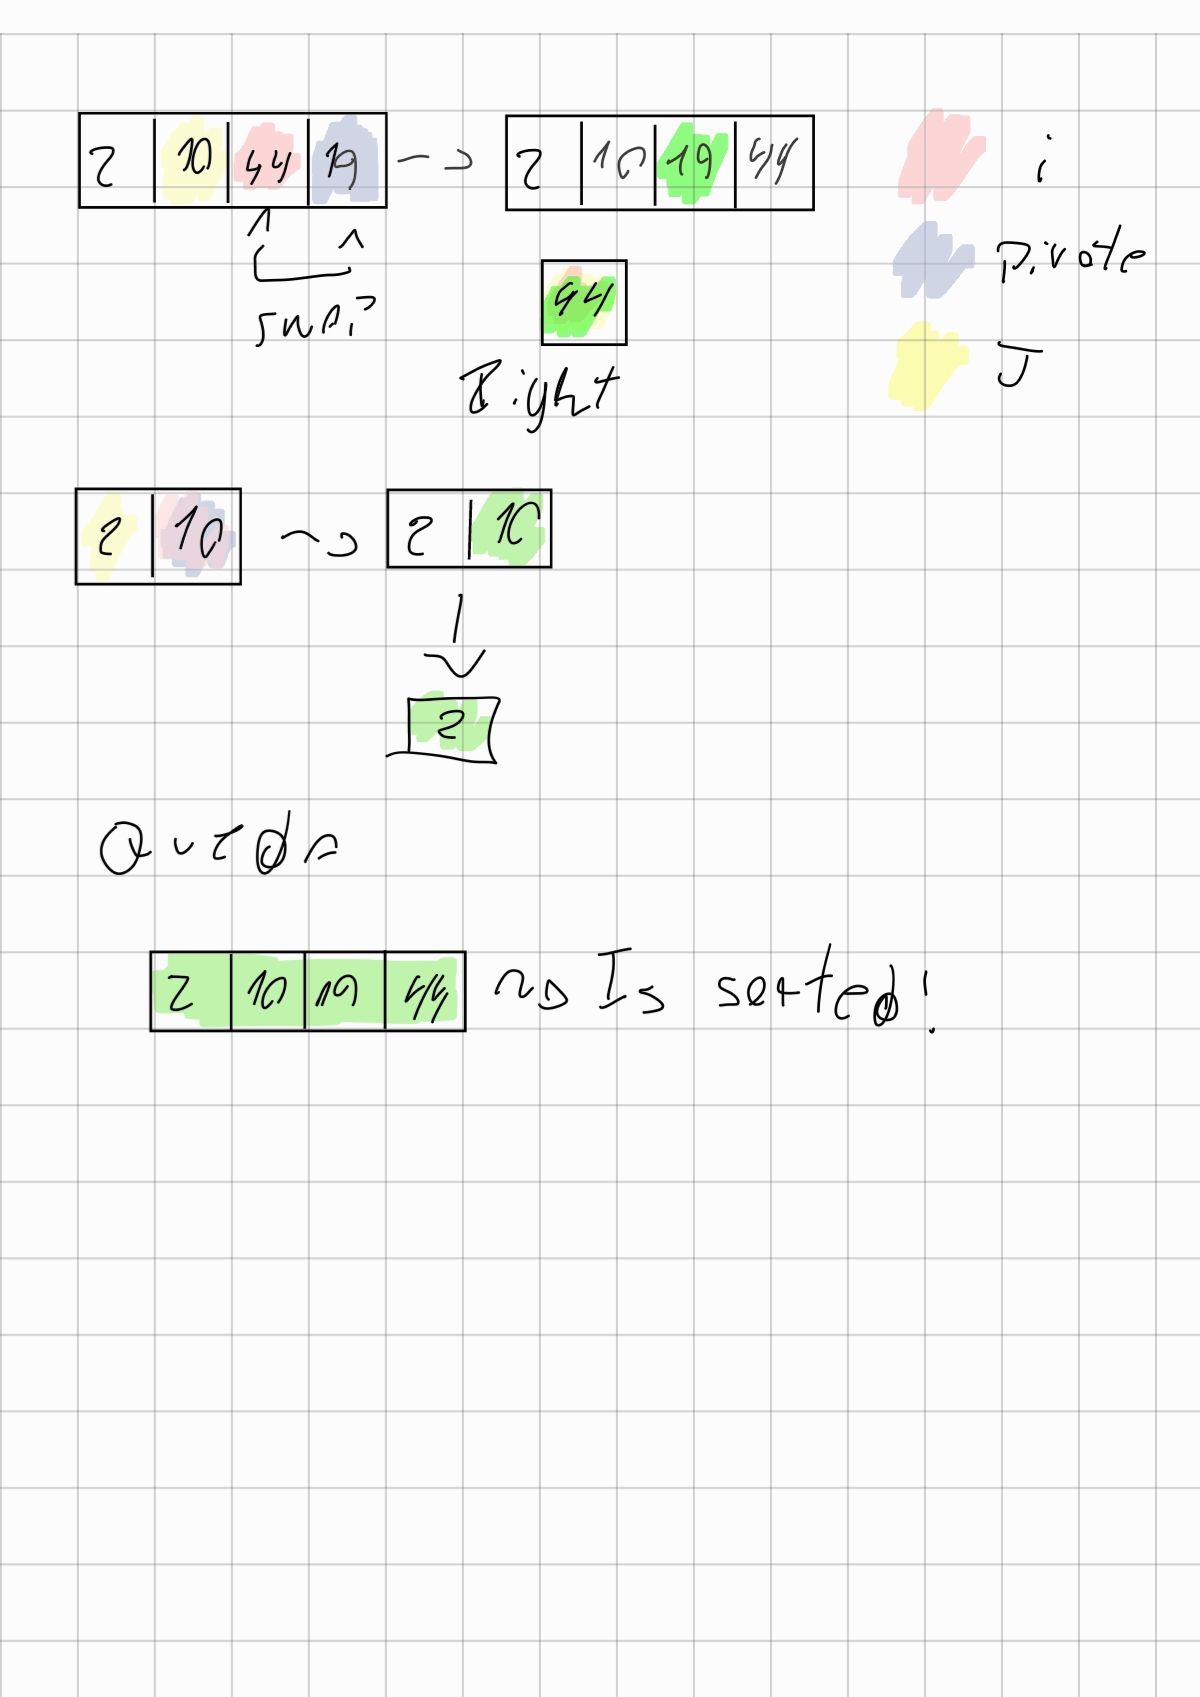

## 2.4. Ejecución del algoritmo paso a paso (`verbose = True`)

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [ ]:
import random
a = random.sample(range(1, 100), 6)
n = len(a)
cont = [0]
print("Entrada:", a)
rightQuicksort(a, 0, n-1, cont, verbose=True)
print("Salida:", a)

Entrada: [28, 63, 26, 8, 40, 30]
Pivote: 30
No se han cruzado (i, j): 1 < 3
Se realiza un swap: 63 > 30
Subarreglo izquierdo: [28, 8, 26] < 30
Subarreglo derecho: [30, 40, 63] > 30
Pivote: 26
No se han cruzado (i, j): 0 < 1
Se realiza un swap: 28 > 26
Subarreglo izquierdo: [8] < 26
Subarreglo derecho: [26, 28, 30, 40, 63] > 26
Pivote: 63
Subarreglo izquierdo: [8, 26, 28, 30] < 40
Subarreglo derecho: [40, 63] > 40
Salida: [8, 26, 28, 30, 40, 63]


#**3. Tiempo de ejecución**

## **Teorema (Tiempo de ejecución).**

El algoritmo **QuickSort** tiene un **tiempo de ejecución de** $O(n log(n))$ en el caso promedio y el mejor caso, y $O(n^2)$ en el peor caso.

### Caso Promedio


Prueba de teorema mediante el **arbol de recursión**

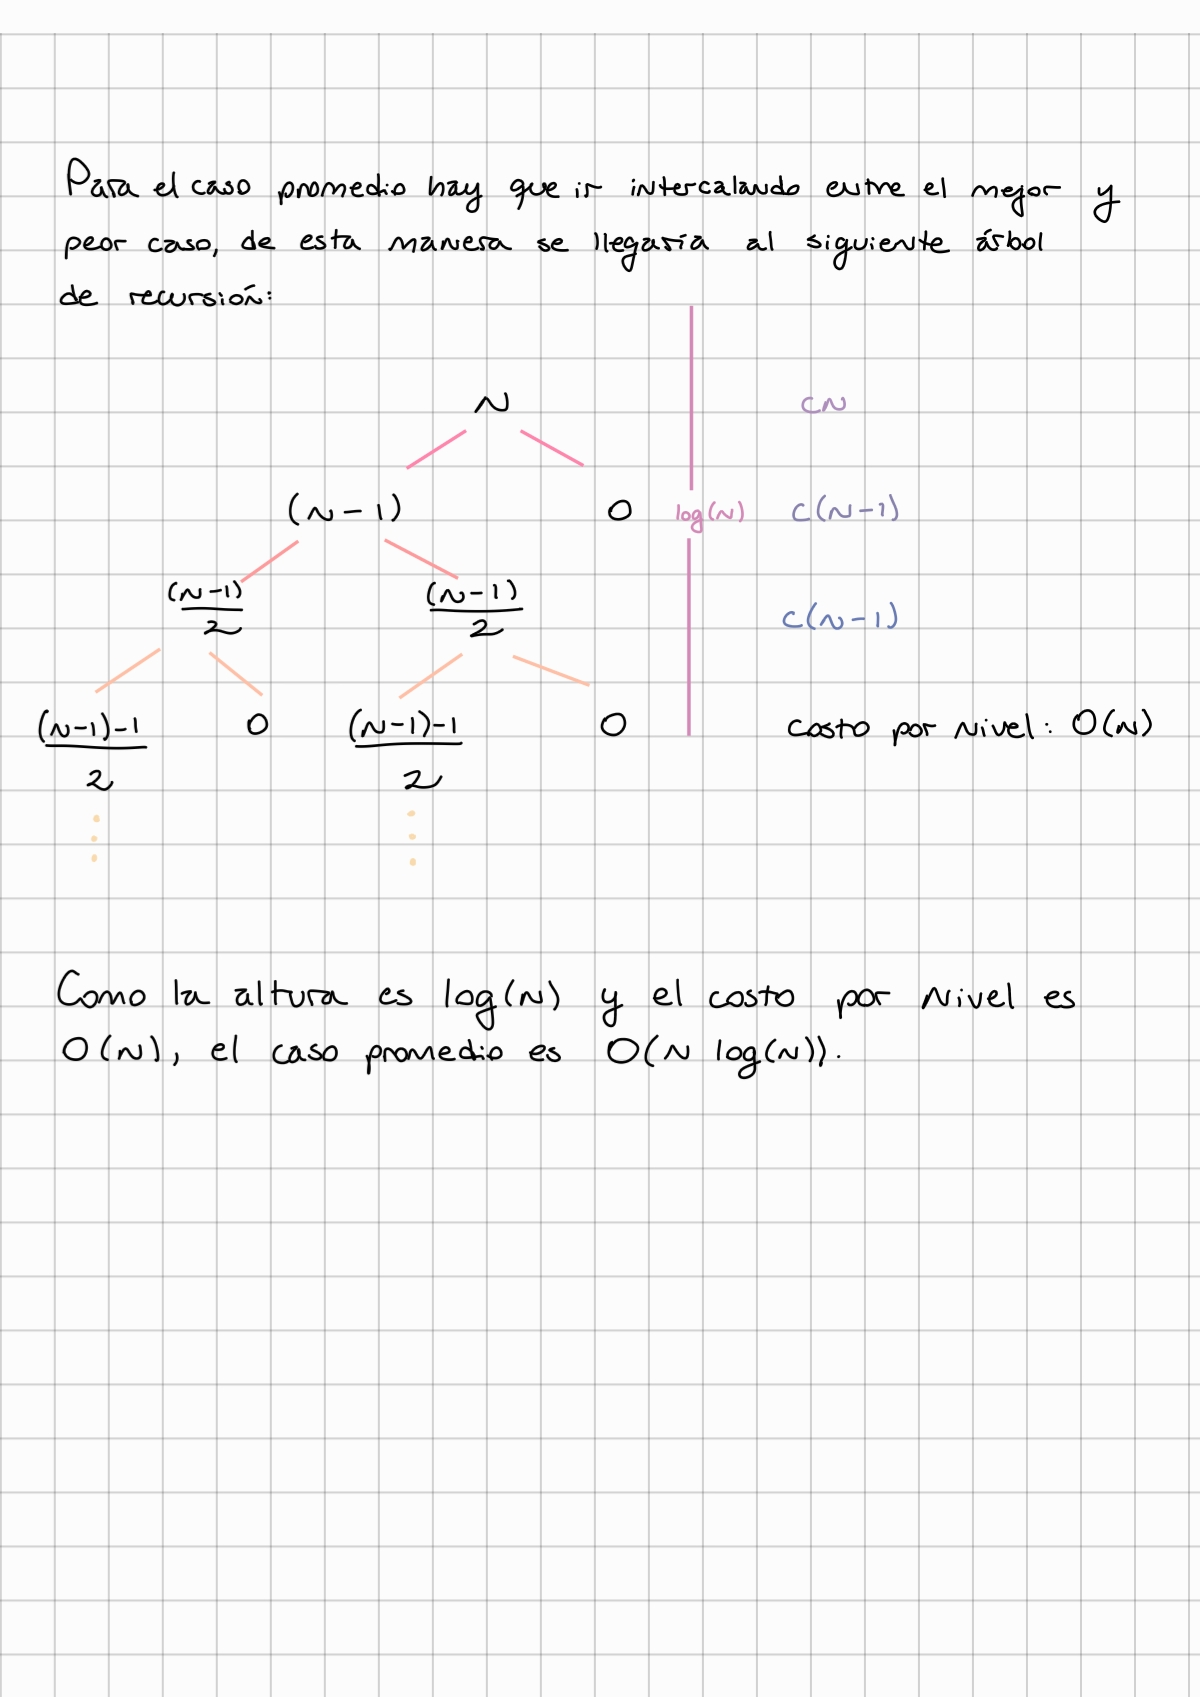

### Mejor caso

Prueba del teorema mediante el **Teorema maestro**

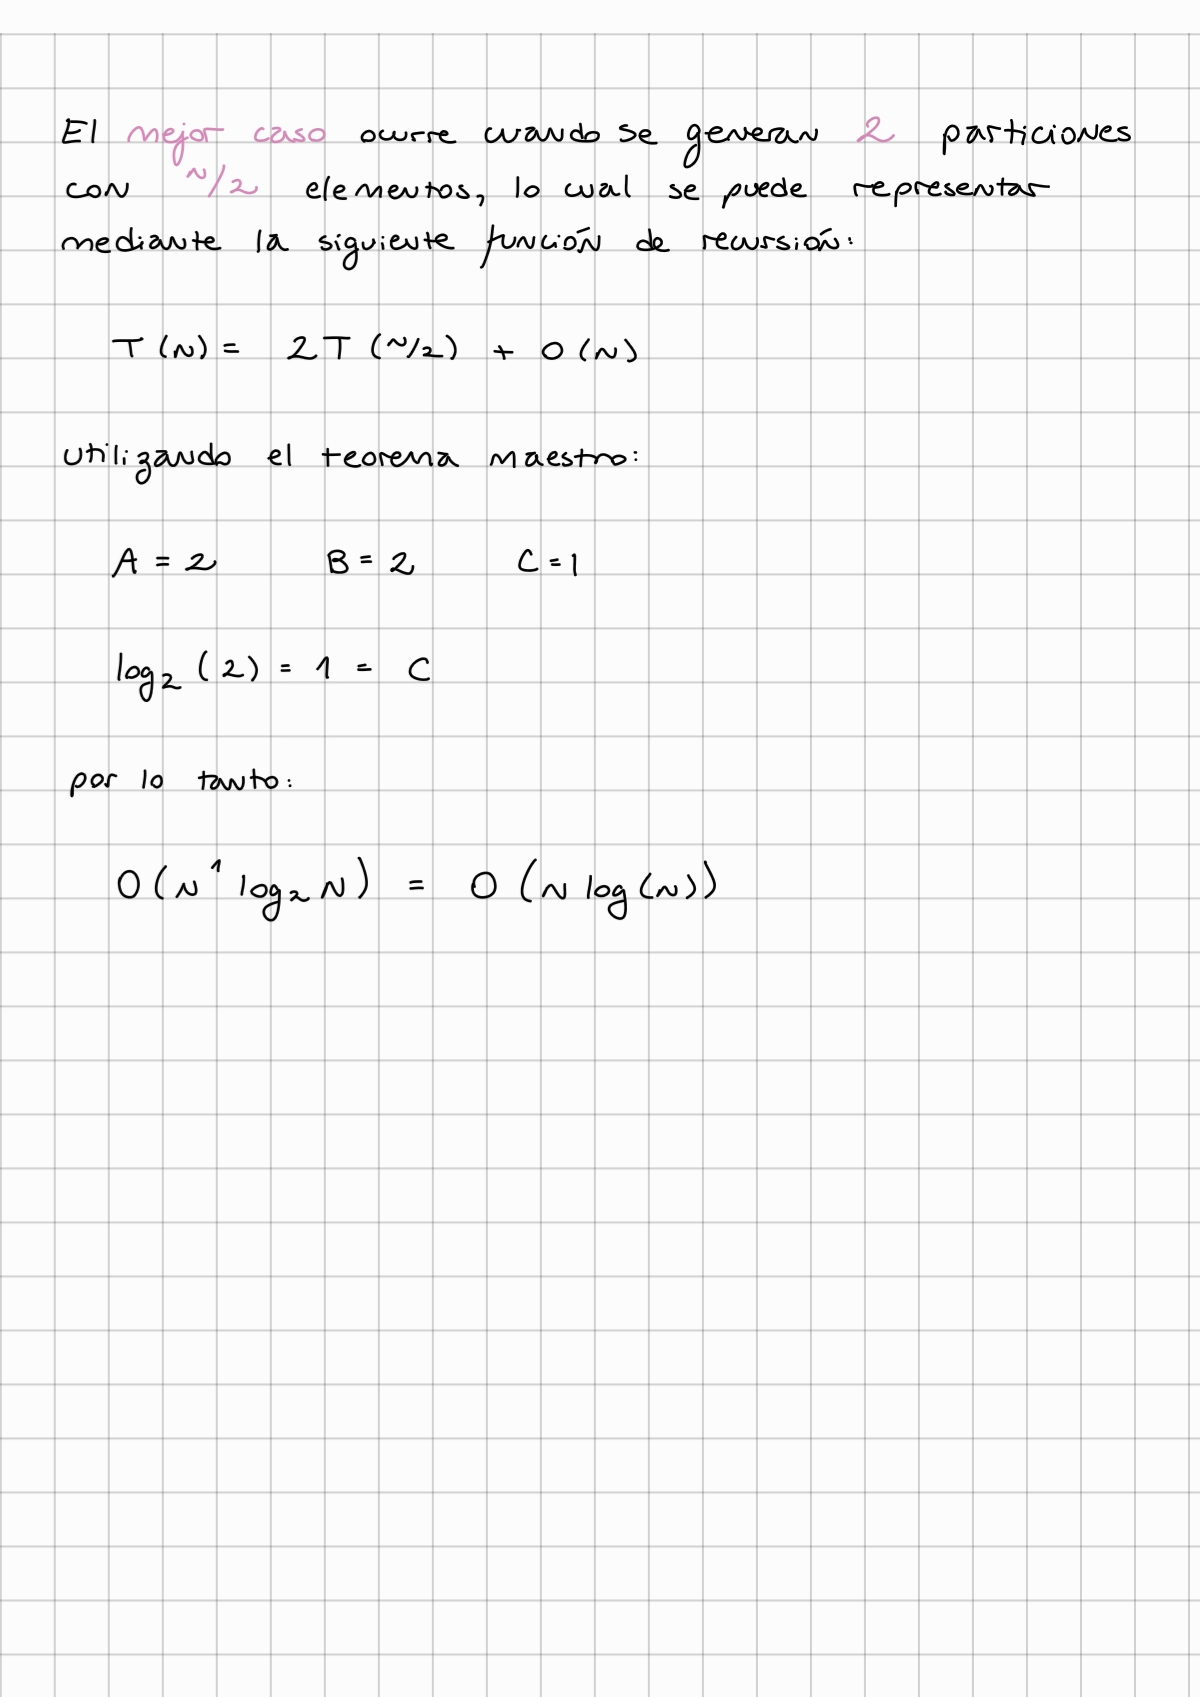

### Peor caso

Prueba del teorema mediante **Sustitución matematica**

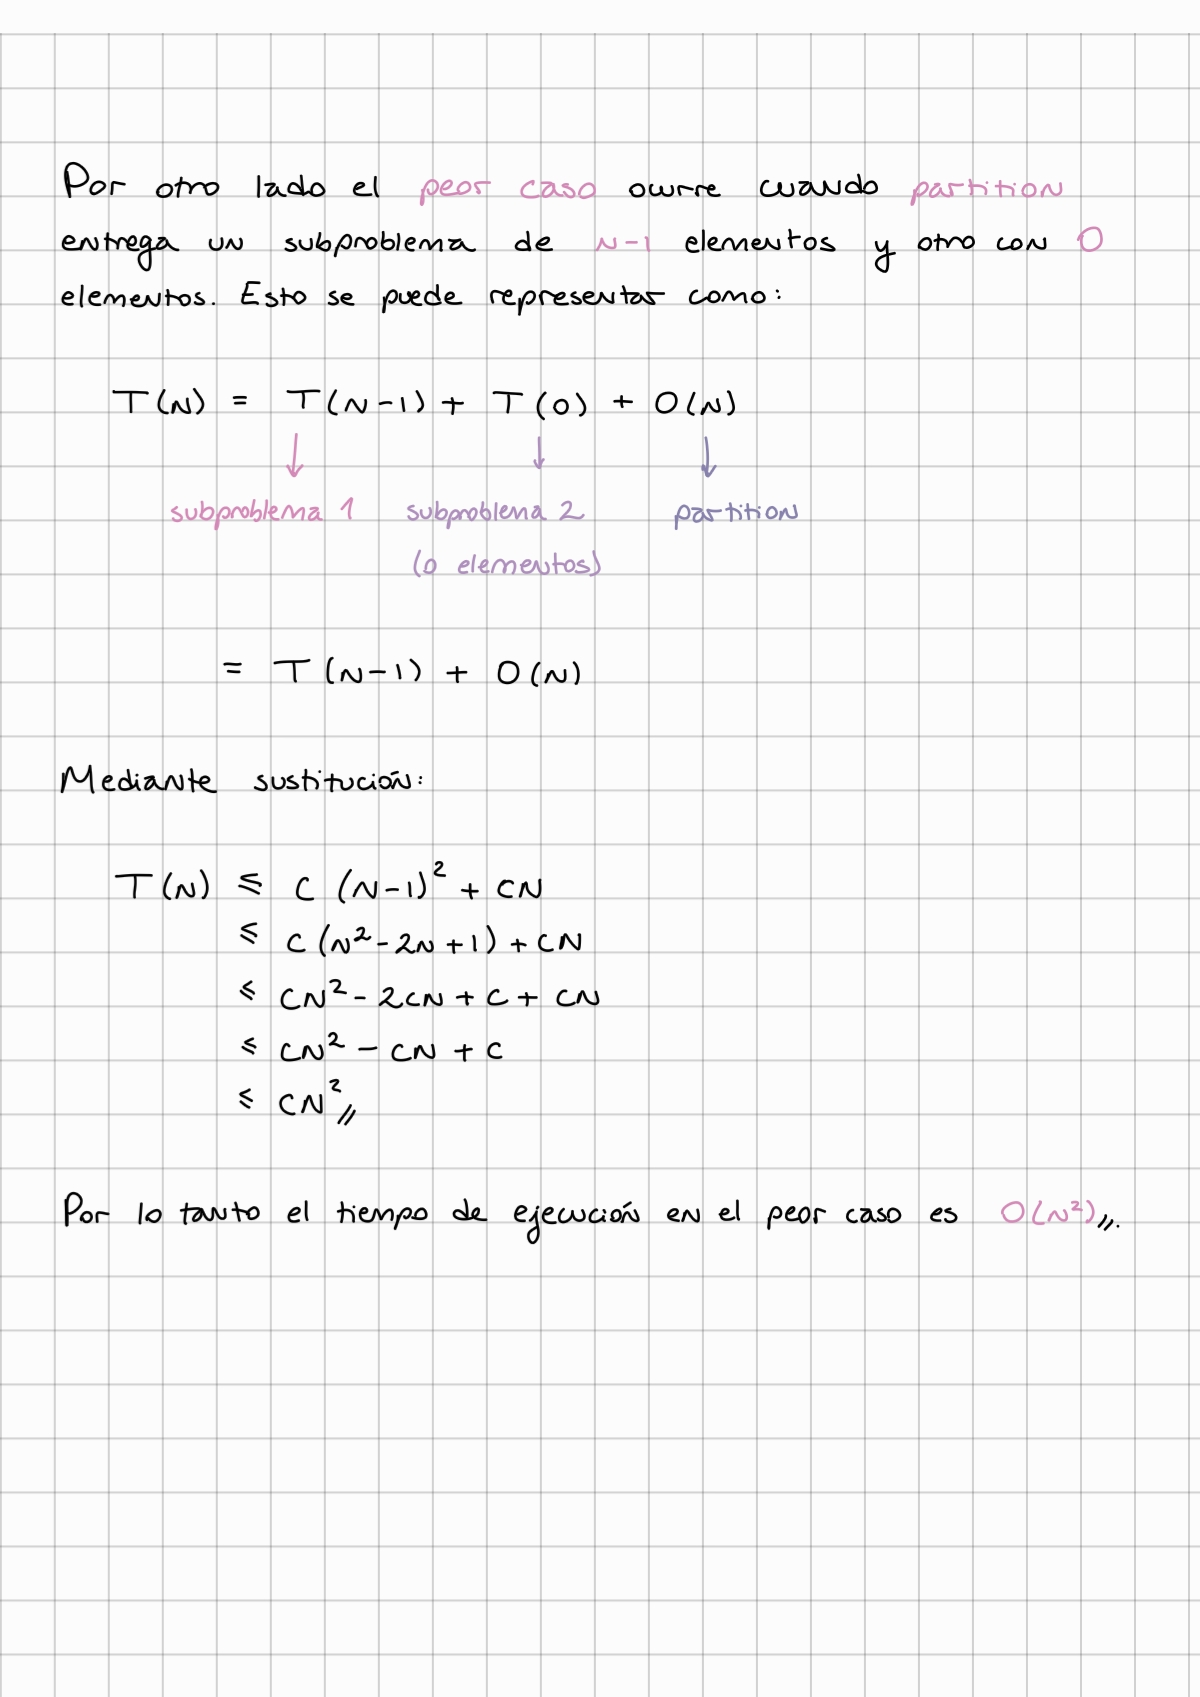

# **4. Correctitud**

##**Teorema (Correctitud).**

El algoritmo **QuickSort** genera un arreglo: $[a_1,a_2,...a_n]$, con los mismos elementos del arreglo de entrada, pero ordenados de menor a mayor, es decir $a_1≤a_2≤...≤a_n$.

Para comprobar el teorema utilizaremos la *inducción matemática* (QuickSort) y la propiedad del *bucle invariante* (Partition).











### **Bucle invariante (Partition)**





La propiedad invariante del bucle nos asegura que la función $partition()$ es correcta.

**Propiedad invariante de bucle:** Al comienzo de cada iteración, para cualquier indice k, tenemos que:

* Si $p≤k≤i$, entonces $arr[k]≤A[r]$

* Si $i<k<j$, entonces $arr[k]>A[r]$

**Inicialización**: Al comienzo de la primera iteración del bucle, no existen elementos entre las variables, por lo cual la propiedad se cumple.

**Mantención:** Una vez inicializado el loop for, tenemos dos casos:


*   $arr[ j ] ≤  arr[ r ]$
*   $arr[ j ]  >  arr[ r ]$

Al ocurrir el primer caso se realiza un **swap** entre $arr[j]$ y $arr[i]$, y se aumentaría el valor de *i*, de esta manera cumpliendo la propiedad.

En el segundo caso solamente se aumentaría el valor de j, y de esta manera la propiedad se seguirá cumpliendo, ya que $a[j]≤a[r]$ no se cumple.

**Finalización**: El bucle finaliza cuando $r = j$, llegados a este punto el arreglo se dividirá en 3 partes, los menores al pivote, los mayores y el pivote que es el punto de partición.

### **Inducción matemática (QuickSort)**


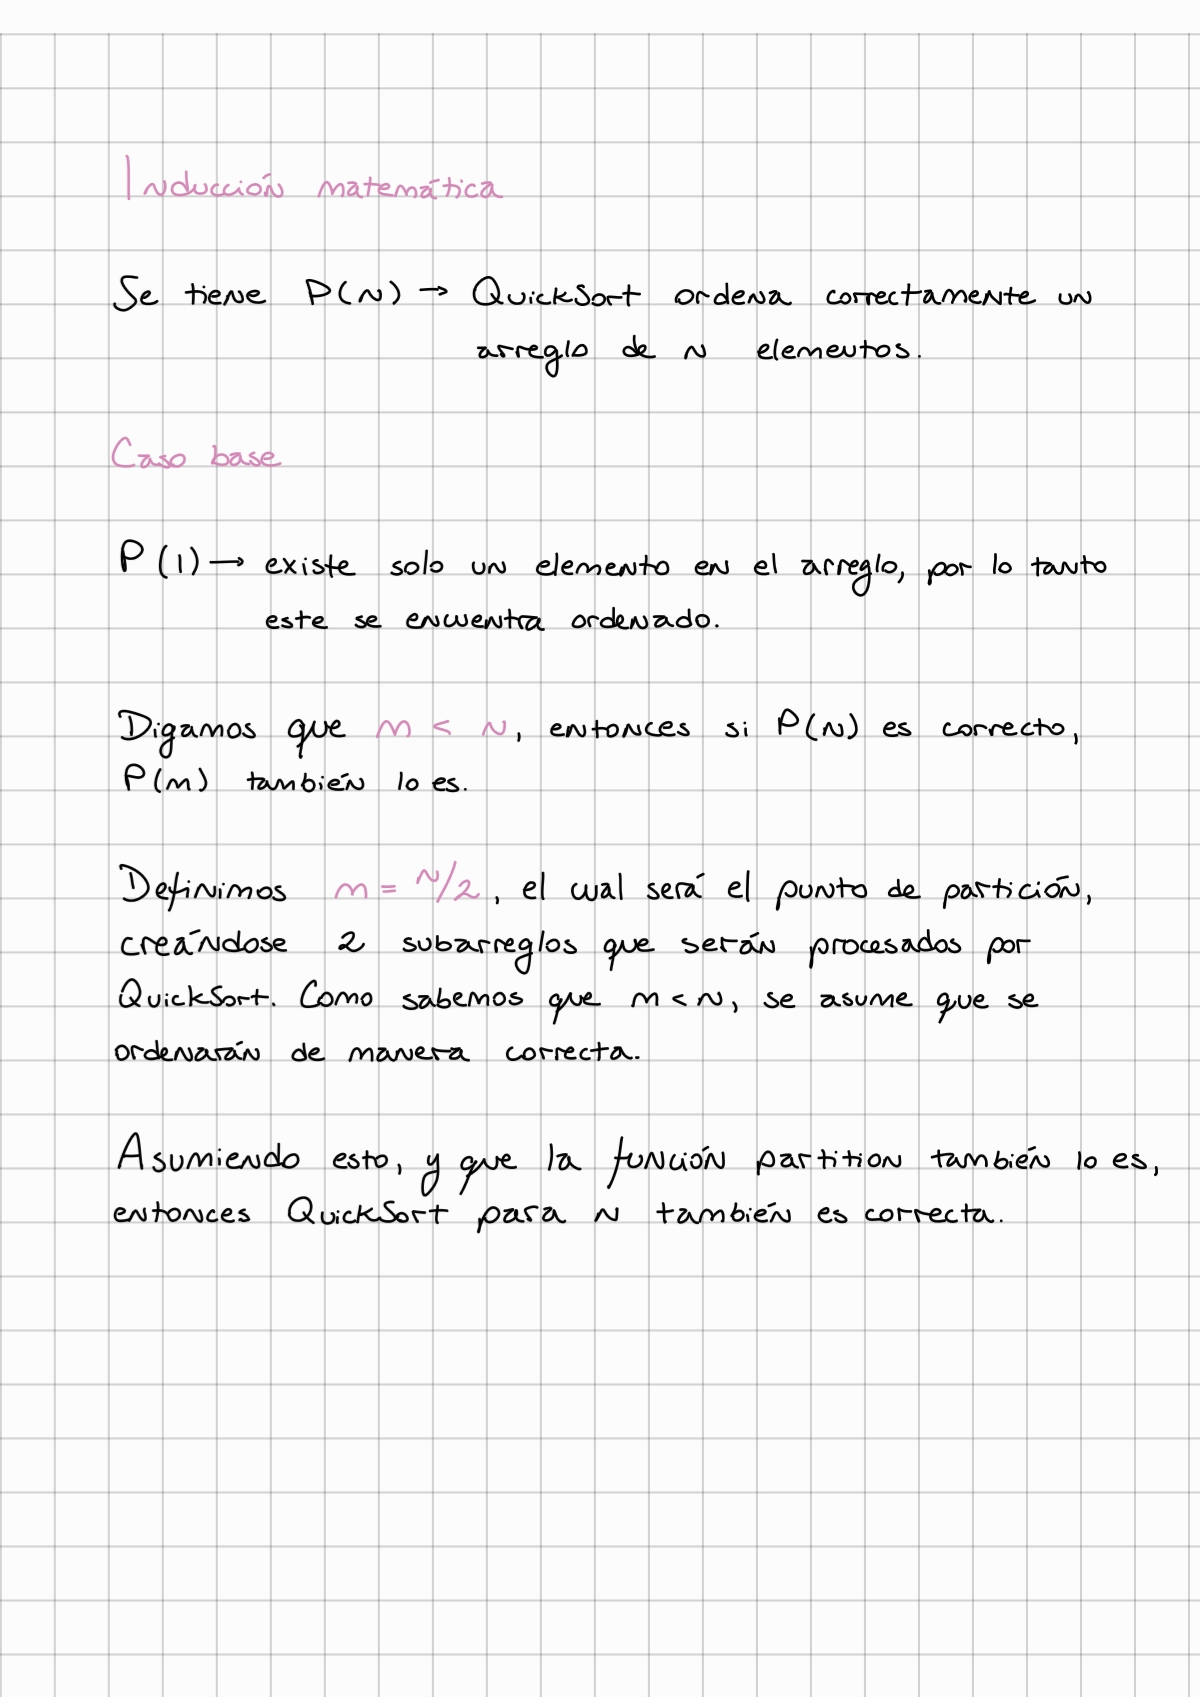

# **5. Experimentos.**

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente, 
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,19]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

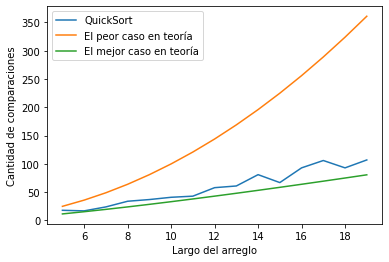

In [157]:
import matplotlib.pyplot as plt 
import random
from math import log2

x=[n for n in range(5,20)] 
y1=[n**2 for n in range(5,20)] # peor caso
y2=[n*log2(n) for n in range(5,20)] # mejor caso
y=[]; 

for n in range(5,20):
  cont = [0]
  a = random.sample(range(1, 100), n)
  rightQuicksort(a, 0, len(a)-1, cont, verbose = False)
  y.append(cont[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["QuickSort", "El peor caso en teoría", "El mejor caso en teoría"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de comparaciones')
plt.show()

### **Análisis de resultados**



Al ver el gráfico se puede apreciar que el **QuickSort** se acerca bastante al mejor caso, esto se debe a que el tiempo de ejecución promedio es similar al mejor ($O(nlogn)$), lo cual deja en evidencia lo eficaz que es este algoritmo de ordenamiento.

## 5.2. Tiempo de ejecución (QuickSort vs MergeSort)

En los siguientes gráficos se reporta el tiempo de ejecución de los algoritmos de ordenamiento **QUickSort** y **MergeSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambos algoritmos.

### Comparación tiempo de ejecución *QuickSort vs MergeSort*

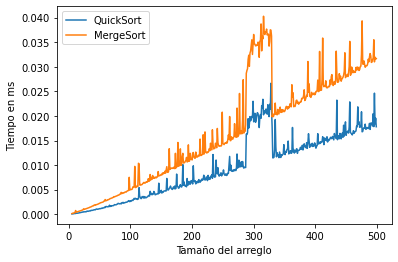

In [100]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def merge(array, left, mid, right, verbose, cont):
    len1 = mid - left + 1
    len2 = right - mid
    tot = 0 # Se utiliza para la impresión correcta del arreglo

    # Se crean los subArreglos.
    a1 = [0] * (len1)
    a2 = [0] * (len2)

    
    # Se copian los datos del arreglo a los sub arreglos.
    for i in range(0, len1):
        a1[i] = array[left + i]
 
    for j in range(0, len2):
        a2[j] = array[mid + 1 + j]
    
    #Se muestran los SubArreglos (verbose = True)
    if (verbose == True):
        print("SubArreglo Izquierdo: ", a1)
        print("SubArreglo Derecho: ", a2, "\n")
    
    # Indices utilizados para los subarreglos
    i = j = 0 
    # k parte desde la izquierda
    k = left
 
    # Mientras que los dos arreglos tengan elementos que comparar
    while (i < len1 and j < len2):
      
      if (a1[i] <= a2[j]):
        cont[1] = cont[1] + 1 # Se aumenta el contador de comparaciones
        array[k] = a1[i]
        
        if (verbose == True):
          print(f"Elemento del subarreglo izquierdo es menor: ", colored(f"{str({a1[i]})[1:-1]}","red"), " < ", colored(f"{str({a2[j]})[1:-1]}","blue"))
          print("Arreglo resultante: ", colored(f"{str(array[k-tot: k])[1:-1]}","green"), ",", colored(f"{str(array[k:k + 1])[1:-1]}","red"))
          print("\n")
          
        i = i + 1
      
      else:
        cont[1] = cont[1] + 1
        array[k] = a2[j]

        if (verbose == True):
          print(f"Elemento del subarreglo derecho es menor: ", colored(f"{str({a2[j]})[1:-1]}","red"), " < ", colored(f"{str({a1[i]})[1:-1]}","blue"))
          print("Arreglo resultante: ", colored(f"{str(array[k-tot: k])[1:-1]}","green"), ",", colored(f"{str(array[k:k + 1])[1:-1]}","red"))
          print("\n")
        
        j = j + 1
      k = k + 1
      tot = tot + 1
 
    # Se copian los elementos restantes del subarreglo izquierdo
    while (i < len1):

      array[k] = a1[i]
      cont[1] = cont[1] + 1
      
      if (verbose == True):
          print(f"Se agregan los elementos restantes: ", colored(f"{str({a1[i]})[1:-1]}","red"))
          print("Arreglo resultante: ", colored(f"{str(array[k-tot: k])[1:-1]}","green"), ",", colored(f"{str(array[k:k + 1])[1:-1]}","red"))
          print("\n")
      
      i = i + 1
      k = k + 1
      tot = tot + 1
 
    # Se copian los elementos restantes del subarreglo derecho
    while (j < len2):
      
      array[k] = a2[j]
      cont[1] = cont[1] + 1
      
      if (verbose == True):
          print(f"Se agregan los elementos restantes: ", colored(f"{str({a2[j]})[1:-1]}","red"))
          print("Arreglo resultante: ", colored(f"{str(array[k-tot: k])[1:-1]}","green"), ",", colored(f"{str(array[k:k + 1])[1:-1]}","red"))
          print("\n")
      
      j = j + 1
      k = k + 1
      tot = tot + 1
 
# Función merge implementada de manera recursiva
def mergeSort(arr, l, r, cont, verbose):
    if l < r:
 
      # Posición del medio del arreglo.
      mid = l+(r-l)//2
      # Se aumenta el contador de recursión
      cont[0] = cont[0] + 1
      # Ordena los dos subArreglos resultantes.
      mergeSort(arr, l, mid, cont, verbose)
      mergeSort(arr, mid+1, r, cont, verbose)
      #Se unen los subarreglos ordenadamente 
      merge(arr, l, mid, r, verbose, cont)


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiempo obtenido.
  t1 = repeat(setup="from __main__ import rightQuicksort", stmt=f"rightQuicksort({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["QuickSort", "MergeSort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Total de comparaciones *QuickSort vs MergeSort*

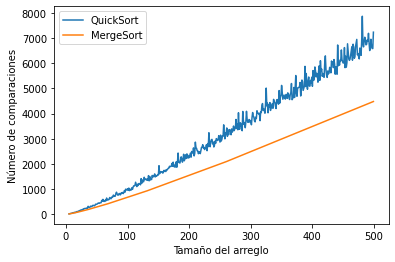

In [101]:
x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  cont1 = [0]
  mergeSort(a, 0, n-1, cont, verbose = False)
  a = random.sample(range(1, 1000), n)
  a = rightQuicksort(a, 0, n-1, cont1,verbose = False)
  x.append(n)
  y.append(cont1[0])
  y1.append(cont[1])


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["QuickSort", "MergeSort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Número de comparaciones')
plt.show()

### **Análisis de resultados**



* Al comparar los gráficos, se puede concluir que el algoritmo de búsqueda *QuickSort* es más eficiente en tiempo de ejecución que el *MergeSort*, en donde el *QuickSort* no supera los 0.025 ms, en cambio *MergeSort* supera esto  llegando hasta los 0.035 ms. A pesar de que el *MergeSort* posee el mismo tiempo de ejecución en todos los casos $O(nlog(n))$, *QuickSort* lo supera al momento de ejecutarse, esto debido a que *MergeSort* necesita espacio adicional, cosa que *QuickSort* no necesita. Además, *QuickSort* posee una buena localidad de caché, lo cual es mas eficiente en muchos casos a *MergeSort*

* Por otro lado la cantidad de comparaciones del MergeSort tiene un crecimiento constante, esto debido a que siempre realiza el mismo procedimiento independiente del arreglo que reciba. En cambio la cantidad de comparaciones deñ *QuickSort* puede depender de como sea el arreglo que reciba, ya que si este se encuentra ordenado o casi completamente ordenado se dariá uno de los peores escenarios para este ($O(n^2)$).

* Por último, podemos notar que ambos algoritmos tienen *peaks*, lo cual se debe a variaciones en la carga de trabajo de la máquina virtual de Google Colab.

## 5.3 Rendimiento en a partir de la posición del pivote

En los siguientes graficos se reporta el tiempo de ejecución de **QuickSort** a partir de la selección del pivote. Además, se realizará otro grafico que contará el total de comparaciones que realiza cada algoritmo.

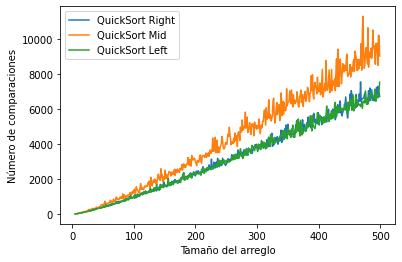

In [159]:
x = []; y = []
y1 = []
y2 = []
for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0]
  cont1 = [0]
  cont2 = [0]
  midQuicksort(a, 0, n-1, cont)
  a = random.sample(range(1, 1000), n)
  rightQuicksort(a, 0, n-1, cont1,verbose = False)
  a = random.sample(range(1, 1000), n)
  leftQuicksort(a, 0, n-1, cont2)
  x.append(n)
  y.append(cont1[0])
  y1.append(cont[0])
  y2.append(cont2[0])


plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["QuickSort Right", "QuickSort Mid", "QuickSort Left"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Número de comparaciones')
plt.show()

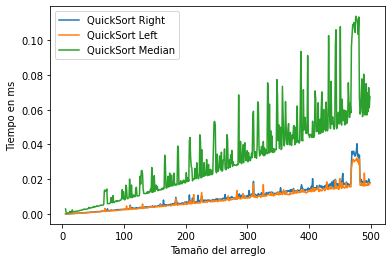

In [156]:
x=[]; y=[]
y1=[]
y2 =[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiempo obtenido.
  t1 = repeat(setup="from __main__ import rightQuicksort", stmt=f"rightQuicksort({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import leftQuicksort", stmt=f"leftQuicksort({a},{0},{n-1},{cont})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import midQuicksort", stmt=f"midQuicksort({a},{0},{n-1},{cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)
  y2.append(t3)


plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["QuickSort Right", "QuickSort Left", "QuickSort Median"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

* Lo primero que se puede observar es el rendimiento superior que tiene **QuickSort** al elegir como pivote el primer o ultimo elemento. Quizas esto se deba al pequeño costo agregado que posee el elegir la mediana de 3 elementos de manera constante o porque el pivote escogido no era el correcto, y se podían llegar a generar particiones con 0 elementos, llegando al peor caso.

* Por otro lado la cantidad de comparaciones al elegir la mediana es mucho mayor que las demas, seguramente fue debido a la elección del pivote. En cambio al elegir como pivote el primer o ultimo elemento la cantidad de comparaciones es bastante similar, dejando en evidencia que la elección de un buen pivote es importante para que este algoritmo sea eficiente. Pero cabe decir que si los elementos hubieran estado ordenados la elección de un pivote que este cerca de la mediana sería mucho mas eficiente, ya que teniendo un elemento al inicio o final del arreglo nos llevaría al peor caso del algoritmo $O(n^2)$ 

* Por ultimo, los peaks existentes en los 3 tipos de pivotes ocurren debido a las variaciones en la carga de trabajo de la máquina virtual de Google Colab 
